In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df= pd.read_csv("/Users/jinyunlin/QFE-Research/QFEgeometry/data/IsingCT/1Dspin_segments_output_12_12.000000000000_0.400000000000_1.000000000000.csv")
invT = 12

In [5]:
av_data = np.loadtxt("/Users/jinyunlin/QFE-Research/QFEgeometry/data/IsingCT/Ising1DCT.dat")
invT = 12

In [6]:
N10 = av_data[av_data[:, 0]==10]
N20 = av_data[av_data[:, 0]==20]
N32 = av_data[av_data[:, 0]==32]

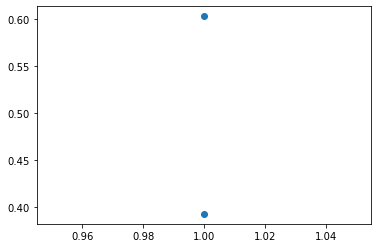

In [7]:
plt.scatter(N10[:, 2], N10[:, -3])

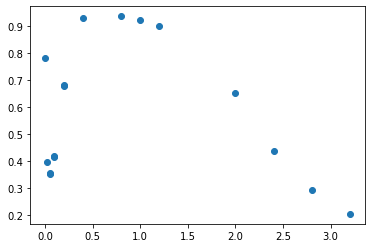

In [10]:
plt.scatter(N10[:, 2], N10[:, 4])

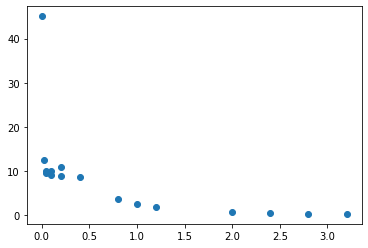

In [11]:
plt.scatter(N10[:, 2], N10[:, -7])

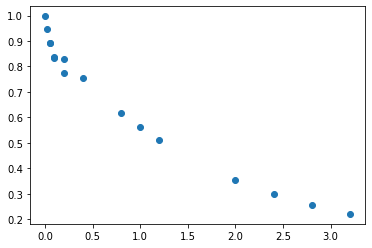

In [12]:
plt.scatter(N10[:, 2], N10[:, -5])

In [8]:
def wraparound(start, end):
    """Handles periodic boundary in imaginary time."""
    if end >= start:
        return [(start, end)]
    else:
        return [(start, invT), (0.0, end)]

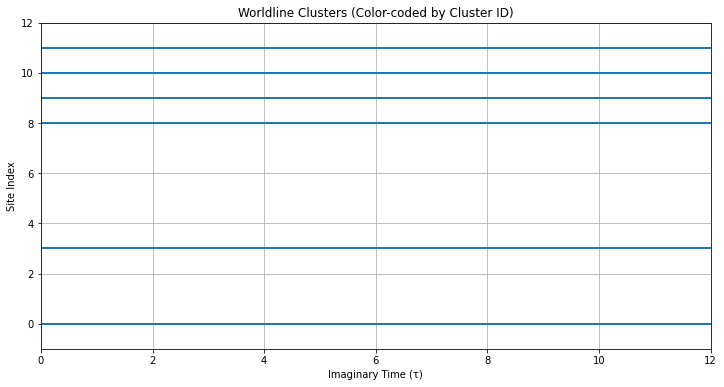

In [13]:
from matplotlib.cm import get_cmap

# Get a colormap for cluster ID highlighting
cmap = get_cmap("tab20")
unique_clusters = sorted(df['cluster_id'].unique())
cluster_to_color = {cid: cmap(i % 20) for i, cid in enumerate(unique_clusters)}
sites_to_plot = sorted(df['site_id'].unique())

plt.figure(figsize=(12, 6))
ax = plt.gca()

for site in sites_to_plot:
    site_data = df[df['site_id'] == site]
    for _, row in site_data.iterrows():
        intervals = wraparound(row['start_time'], row['end_time'])
        for start, end in intervals:
            color = cluster_to_color.get(row['cluster_id'], 'gray')
            ax.plot([start, end], [site, site], color=color, linewidth=2)

ax.set_xlabel("Imaginary Time (τ)")
ax.set_ylabel("Site Index")
ax.set_title("Worldline Clusters (Color-coded by Cluster ID)")
ax.set_xlim([0, invT])
ax.set_ylim([-1, max(sites_to_plot)+1])
ax.grid(True)
plt.show()

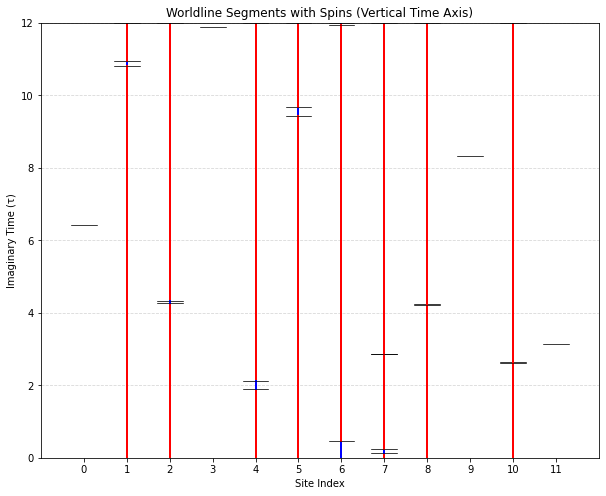

In [16]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

for site in sites_to_plot:
    site_data = df[df['site_id'] == site]
    for _, row in site_data.iterrows():
        intervals = wraparound(row['start_time'], row['end_time'])
        for start, end in intervals:
            color = 'blue' if row['spin'] == 1 else 'red'
            ax.plot([site, site], [start, end], color=color, linewidth=2)

            # Add horizontal tick marks at the segment endpoints
            ax.plot([site - 0.3, site + 0.3], [start, start], color='black', linewidth=0.5)
            ax.plot([site - 0.3, site + 0.3], [end, end], color='black', linewidth=0.5)

ax.set_ylabel("Imaginary Time (τ)")
ax.set_xlabel("Site Index")
ax.set_title("Worldline Segments with Spins (Vertical Time Axis)")
ax.set_ylim([0, invT])
ax.set_xlim([-1, max(sites_to_plot)+1])
ax.set_xticks(sites_to_plot)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

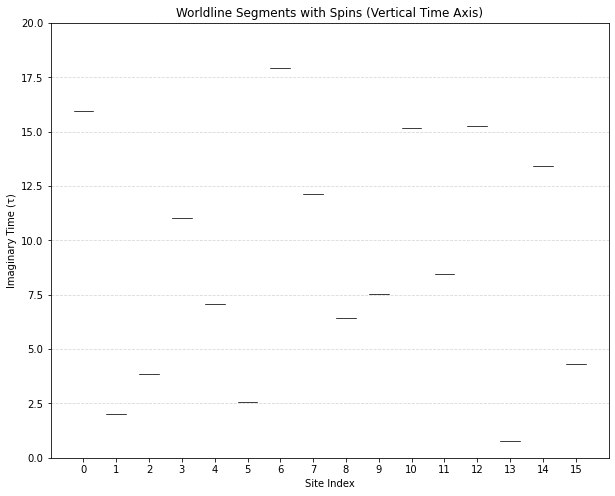

In [79]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

for site in sites_to_plot:
    site_data = df[df['site_id'] == site]
    for _, row in site_data.iterrows():
        intervals = wraparound(row['start_time'], row['end_time'])
        for start, end in intervals:
            color = 'blue' if row['spin'] == 1 else 'red'
            ax.plot([site, site], [start, end], color=color, linewidth=2)

            # Add horizontal tick marks at the segment endpoints
            ax.plot([site - 0.3, site + 0.3], [start, start], color='black', linewidth=0.5)
            ax.plot([site - 0.3, site + 0.3], [end, end], color='black', linewidth=0.5)

ax.set_ylabel("Imaginary Time (τ)")
ax.set_xlabel("Site Index")
ax.set_title("Worldline Segments with Spins (Vertical Time Axis)")
ax.set_ylim([0, invT])
ax.set_xlim([-1, max(sites_to_plot)+1])
ax.set_xticks(sites_to_plot)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()